In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

In [2]:
# MovieLens 100K를 데이터셋을 불러옵니다.
df_ratings = pd.read_csv('dataset/ratings_100k.csv')
df_ratings['date'] = df_ratings.pop('timestamp').pipe(lambda x: pd.to_datetime(x, unit='s'))
df_user = pd.read_csv('dataset/users_100k.csv', index_col='user id')
df_movie = pd.read_csv('dataset/movies_100k.csv', index_col='movie id')

In [3]:
df_ratings.shape, df_user.shape, df_movie.shape

((100000, 4), (943, 4), (1682, 21))

# 머신 러닝(기계 학습, Machine Learning)

연산 장치(Computer)로 성능 향상을 위한 명시적인 알고리즘 없이 데이터를 통해 성능을 향상시키는 방법을 연구하는 분야

# 지도 학습(Supervised Learning)

- 머신러닝 모델을 정답이 주어진 데이터로 학습(Training)을 시키는 것

## 회귀 (Regression)

- 정답이 수치형

Ex) 사용자의 아이템에 대한 평점을 예측

## 분류 (Classfication)

- 정답이 범주

Ex) 사용자가 아이템을 좋아요/싫어요 피드백을 예측

# 비지도 학습(Unsupervised Learning)

- 머신러닝 모델을 정답이 주어지지 않은 데이터로 학습(Training)을 시키는 것

# 머신러닝 모델(Machine Learning  Model)

- 데이터에서 추출한 지식(패턴)을 연산 장치(컴퓨터)에 근사화한 객체

# 성능 지표(Performance Metric)

## 회귀

  - Mean Squared Error(MSE)
  - Mean Absolute Error(MAE)
  - R2 Score
  
## 분류

  - Accuracy
  - Precision  
  - Recall
  
# 모델 검증 

  - 학습(Train)/검증(Validation) 단순 분리
  - 교차 검증 (Cross-Validation)

# 기계학습의 궁극 목표

- 실제 투입이 되었을 때 성능이 좋은 머신러닝 모델을 만드는 것

  > 학습 데이터를 통해 일반화(Generalized)된 머신러닝 모델을 만드는 것
  
  > 과적합(Over-fit): 학습데이터에 모델이 지나치게 맞추어져 학습데이터에 치우치게 되어 실제 데이터에 대한 성능이 떨어지게 되는 현상입니다.
  
  > 과소적합(Over-fit): 학습데이터에 모델이 덜 맞추어져 현상을 제대로 모델이 담지 못하여 실제 데이터에 대한 성능이 떨어지게 되는 현상입니다.
   
  ⇒ 속성 공학 - 파생 변수 생성, 차원 축소, 스캐일링, ... 
  
  ⇒ 최적합 모델을 도출 - 모델 튜닝, 앙상블, ...

# 용어 정의

> 대상 변수(Target Variable) - 지도학습에서 정답에 해당하는 변수

> 입력 변수(Input Variable) - 기계학습 모델에 입력 변수

> 모수 (Parameter) - 모집단이 지니는 특징을 나타내는 수. 모평균 / 모분산 ...

> 가중치 (Weight) - 인공신경망에서의 모수(Parameter)

> 손실 (Loss) - 모델링을 통해서 발생한 실제 현상에 대한 정보 손실


# 머신러닝 모델 (Machine Learning Model)

## 모수적 모델(Parametric Model)

> 모집단의 지식(패턴)을 나타내는 함수로 나타낸 모델

- 학습: 학습 데이터를 통해 함수의 모수를 추정하는 것

  ⇒  학습 데이터에 대한 모델의 손실을 최소화하는 모수를 찾는 것

### 모수적 모델의 손실

회귀: Mean Squared Error

  > $MSE = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$

분류: Cross Entropy 

  > $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

  이진분류일 경우 다음과 같이 축약할 수 있습니다.

  > $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

### 모수적 모델의 규제

- 학습셋에 적합시키는 정도를 제한하기 위한 방법

모수의 크기(Magnitude)를 손실 함수에 더합니다

모수의 크기(Magnitude)가 커질 수록 손실이 커져서

모수의 크기(Magnitude)가 커지는 것을 억제합니다.

> L1-norm: 모수의 절대값의 합을 손실 함수에 반영

> L2-norm: 모수의 제곱의 합을 손실 함수에 반영

### 선형 회귀 모델(Linear Regression)

대상 변수를 선형 함수로 나타낸 모델

$\hat{y_i} = \hat{\beta}_1x_{i1} + \hat{\beta}_2x_{i2} + ... + \hat{\beta}_nx_in + \hat{\beta}_0$

<=> $\hat{y} = X \hat{\beta} + \hat{\beta}_0$

**학습 알고리즘**

  1.정규방정식(OLS, Ordinary Least Square)
  
  정규방정식의 해 아래와 같이 닫힌 형태로 구할 수 있습니다.
  
  $\hat{\beta} = (X^T X)^{-1} X^T y$
  
  2.경사하강법(Gradient Descent)
  
  - 손실(Loss)에 대한 모수의 기울기(Gradient)를 측정하여 손실(Loss)을 낮추는 방향으로 모수를 찾아가는 방법
  
  $Loss = \frac{1}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)^2}$
  
  $\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

#### **예제: 선형회귀 모델의 학습**

In [4]:
# sckit-learn
from sklearn.datasets import make_regression

# 예제로 사용할 데이터셋을 만듭니다.
X, y = make_regression(
    n_samples=100, 
    n_features=1, 
    n_informative=1, 
    noise=4.0,
    bias=1.0, 
    random_state=123
)

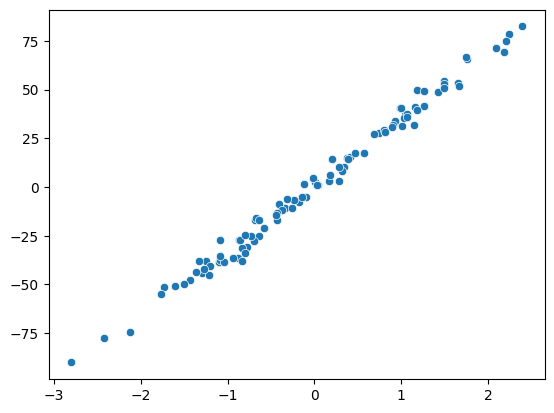

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = X[:, 0], y = y)
plt.show()

$\hat{y_i} = \hat{\beta}_1x_{i1} + \hat{\beta}_0$

**OLS(Ordinary Least Square)**

**X Matrix애 Linear Regression의 상수항(beta_hat_0)을 행렬연산에 포함시켜 구하기 위해 모두 1인 입력변수를 추가합니다.**

In [6]:
# np.ones 모든 값이 1인 tensor를 생성시킵니다. 
X_1 = np.hstack([ # 리스트에 있는 Matrix를 횡결합합니다.
    X,
    np.ones((X.shape[0], 1)) # 모든 값이 X.shape[0]×1 행렬을 만듭니다
])
# 처음 5행만 출력합니다.
X_1[:5]

array([[-0.09470897,  1.        ],
       [-1.25388067,  1.        ],
       [ 0.00284592,  1.        ],
       [ 1.03972709,  1.        ],
       [-0.43435128,  1.        ]])

**OLS 방정식으로 회귀 계수를 구합니다.**

$\hat{\beta} = (X^T X)^{-1} X^T y$

In [7]:
# OLS를 통한 Linear Regression 모델 학습
X_gram =  np.dot(X_1.T, X_1) # X_1^T, X_1 행렬곱을 합니다.
X_gram_inv = np.linalg.inv(X_gram) # X_gram의 역행렬을 구합니다.
beta_hat = np.dot(X_gram_inv, np.dot(X_1.T, y)) # beta_hat을 구합니다.
beta_hat

array([33.9064697 ,  0.96504735])

**입력값과 학습한 선형회귀선을 출력합니다.**

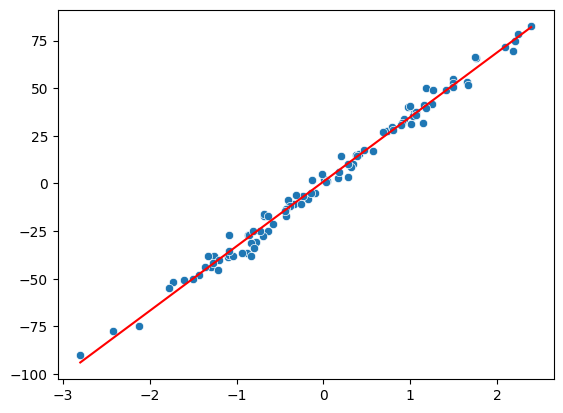

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def linear_reg(X_1, beta_hat):
    """
    학습을 통해 도출한 beta_hat으로 y값 예측합니다.
    Parameters:
        X_1: 입력행렬
        beta_hat: 회귀 계수
    """
    return np.dot(X_1, beta_hat) # 선형 회귀 계수로 입력 변수에 대한 예측을 합니다.

def plot_linear_model(x_min, x_max, beta_hat, **kwarg):
    """
    beta_hat의 회귀선을 출력합니다.
    Parameters:
        x_min: x의 최소값
        x_max: x의 최대값
        beta_hat: 회귀 계수
    """
    x_range = np.array([
        [x_min, 1], 
        [x_max, 1]
    ])
    sns.lineplot(x=x_range[:, 0], y=linear_reg(x_range, beta_hat), **kwarg)
    
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

**경사하강법(Gradient Descent)**

$\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

손실에 대한 회귀 계수의 미분을 이용한 경사(기울기)를 계산하여 손실이 줄어드는 방향으로 

기울기를 업데이트하여 선형 회귀 모델의 계수 (선형 회귀 계수)를 구해봅니다.

In [9]:
beta_hat = np.random.uniform(-1, 1, 2)
beta_hat

array([-0.29359582,  0.74661863])

$\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

In [10]:
y_hat = np.dot(X_1, beta_hat) # y_hat을 구합니다.

In [11]:
np.sum(
    (y - y_hat)[:, None] * X_1, 
    axis=0
) # 위의 합계 과정을 구현합니다. (손실 함수의 일부)

array([4356.52268263,  114.55608157])

In [12]:
np.dot((y - y_hat), X_1) # 위의 식을 dot product를 이용하여 단순화 시킵니다.

array([4356.52268263,  114.55608157])

$\frac{dLoss}{d\hat{\beta}} = -\frac{2}{n}\sum_{i=1}^{n}{\left(y_i - \hat{y}_i\right)x_i}$

In [13]:
- 2 * np.dot((y - y_hat), X_1) / X_1.shape[0]

array([-87.13045365,  -2.29112163])

In [14]:
np.sum(
    np.multiply((y - y_hat)[:, None], X_1), 
    axis=0
)

array([4356.52268263,  114.55608157])

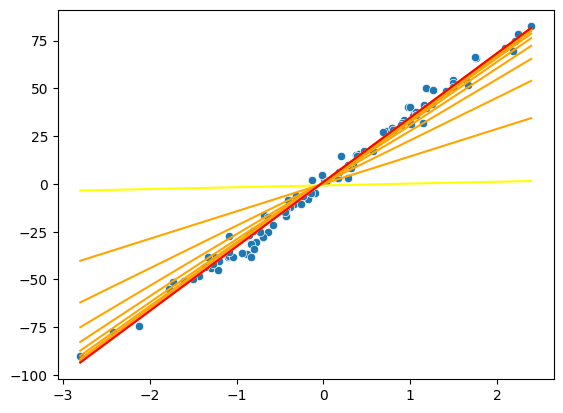

In [15]:
beta_hat = np.random.uniform(-1, 1, 2) # To-Do-With 초기화: -1, 1 사이의 임의 수 2개를 생성합니다.
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='yellow')

learning_rate = 0.02 # 학습율(속도)
# Epoch마다 손실(loss)을 기록하기 위한 리스트
losses = []
for epoch in range(100):
    y_hat = np.dot(X_1, beta_hat) # 현재 회귀 계수의 X_1에 대한 예측 값을 구합니다.
    beta_hat_grad = - 2 * np.dot((y - y_hat), X_1) / X_1.shape[0] # 회귀 계수들의 경사도를 구합니다.
    beta_hat -= beta_hat_grad * learning_rate # To-Do-With 회귀 계수를 업데이트 합니다.
    # 10 epoch 마다 회귀선을 출력합니다.
    if (epoch + 1) % 10 == 0:
        plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='orange')
    loss = np.mean((y - np.dot(X_1, beta_hat)) ** 2)
    losses.append(loss) # To-Do-With 손실(loss)을 기록합니다: Mean Squared Error
# 최종 학습된 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

In [16]:
# 학습한 모수를 출력해봅니다.
beta_hat

array([33.73014332,  0.97333901])

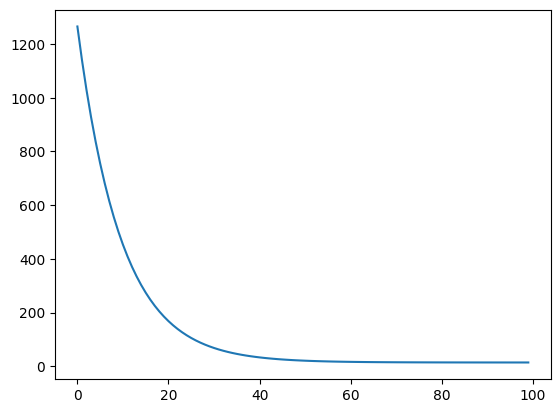

In [17]:
# epoch별로 손실을 출력해봅니다.
sns.lineplot(losses)
plt.show()

- Ridge 모델: Linear Regression에 L2 규제를 적용한 모델

- Lasso 모델: Linear Regression에 L1 규제를 적용한 모델 

- Elastic Net: Linear Regression에 L1/L2 규제를 적용한 모델

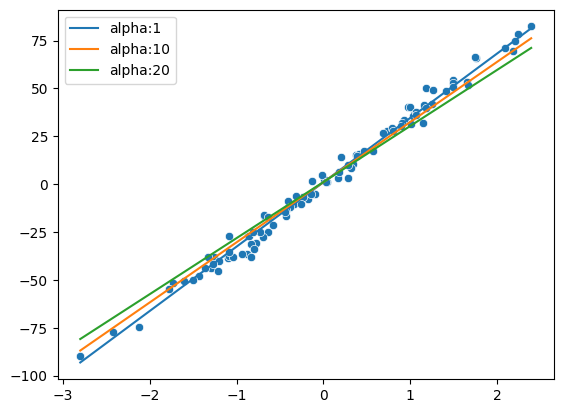

In [18]:
from sklearn.linear_model import Ridge

sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
for alpha in [1, 10, 20]:
    reg_rd = Ridge(alpha=alpha)
    reg_rd.fit(X, y)
    plot_linear_model(
        X[:, 0].min(), X[:, 0].max(), 
        np.array([reg_rd.coef_[0], reg_rd.intercept_]), label='alpha:{}'.format(alpha)
    )
    y_hat = reg_rd.predict(X)
    losses.append(np.mean(np.square(y - y_hat)))
plt.show()

규제(alpha)가 클 수록 기울기는 낮아지고, 이에 따라 변동성을 낮아지게 됩니다.

**Tensorflow**

한 마디로, 모수적 모델을 구현하기 위한 라이브러리입니다.

Matrix Factorization은 모수적 모델입니다. 

이 후 파트에서는 Tensorflow를 통한 모델링 학습이 주를 이룹니다.

이를 위해 Tensorflow에 익숙해져 보기 위해 예를 들어 봅니다.

In [19]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

In [20]:
# GPU가 있다면, GPU 메모리를 최대한 활용할 수 있도록 설정합니다.
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print("{} Physical GPUs, {} Logical GPUs".format(len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [21]:
# Tensorflow로 선형회귀 모델(Linear Regression Model)을 정의합니다.
class LRModel(tf.keras.Model):
    def  __init__(self):
        super().__init__()
        # 출력이 한 개인 밀도 레이어 단층의 신경망
        # Dense Layer에는 입력변수 × 출력변수 형태의 가중치 행렬(Weight Matrix)와 절편(Intercept)이 있습니다.
        # 출력 변수가 1개인 Dense Layer를 생성합니다.
        self.beta_hat = tf.keras.layers.Dense(1) # 

    def call(self, X):
        y_hat = self.beta_hat(X) # X를 beta_hat Layer에 통과 시켜 예측값을 구합니다.
        return y_hat

# Tensorflow 세션 초기화
tf.keras.backend.clear_session()
# 모델 생성합니다. 
lr_model = LRModel()

In [22]:
# 모델의 구동을 확인해봅니다.
lr_model(tf.constant([[1.0], [2.0], [3.0]]))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.5405694],
       [3.0811388],
       [4.6217084]], dtype=float32)>

**Keras**

Deep Learning Framework - Deep Learning을 위한 구성 요소를 틀로써 정의

**학습 방법 1: Train Loop를 통한 학습**

In [23]:
# 손실함수를 생성합니다.
mse = tf.keras.losses.MeanSquaredError()
# 옵티마이저(손실함수를 낮추는 가중치(Weight)를 찾아주는 모듈)을 생성합니다.: Adaptive Gradient Descent 최적화기
optimizer = tf.keras.optimizers.Adagrad(learning_rate=2)

@tf.function
def train_step(X, y):
    # 모델에서 예측값을 구하고, 예측값과 실제값의 손실을 구하는 과정을 tape 객체에 담습니다.
    with tf.GradientTape() as tape:
        y_hat = lr_model(X)
        loss = mse(y, y_hat)
    # 모델에서 학습 가능한 가중치를 가져옵니다.
    variables = lr_model.trainable_variables
    # 가중치에 대한 기울기를 구합니다.
    gradients = tape.gradient(loss, variables)
    # 구한 기울기를 가지고 가중치를 업데이트합니다
    optimizer.apply_gradients(zip(gradients, variables))
    # 손실을 반환합니다.
    return loss

**Tensorflow의 모델 구동 방식**

- Eager Execution - 정의된 연산 단계를 즉각적으로 실행

- Graph Execution - Graph로 표현된 연산 단계를 최적화하여 실행

@tf.function - 지정한 함수안에 연산들을 Graph Execution 방법으로 구동 시키도록합니다.

In [24]:
# tf.data.Dataset: tensorflow 모델에 전달하기 위한 데이터셋(Dataset)
# tf.data.Dataset.from_tensor_slices(...) Tensorflow 용 Dataset으로 만들어 줍니다. 
# batch - Dataset을 64개씩 쪼개줍니다.
ds = tf.data.Dataset.from_tensor_slices((X, y)).batch(64)
losses = []
check_shape = False
for epoch in range(100):
    losses_epoch = []
    for X_, y_ in ds:
        if not check_shape:
            print(X_.shape, y_.shape)
            check_shape = True
        loss = train_step(X_, y_).numpy()
        losses_epoch.append(loss)
    # 학습 루틴을 수행하고, 학습 루틴에서 계산된 loss를 losses_epoch에 추가합니다.
    losses.append(np.mean(losses_epoch))

(64, 1) (64,)


**Batch** - 데이터를 지정한 숫자 만큼을 나누어 전달토록 합니다.

In [25]:
# 입력의 크기가 1 출력 크기  1: 기울기 1개  절편 1개 = 총 모수의 수는 2개가 됩니다.
lr_model.summary()

Model: "lr_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# 학습한 내용을 봅니다.
# 첫번째는 기울기, 두번째는 절편이 됩니다.
lr_model.beta_hat.get_weights()

[array([[32.333004]], dtype=float32), array([1.090326], dtype=float32)]

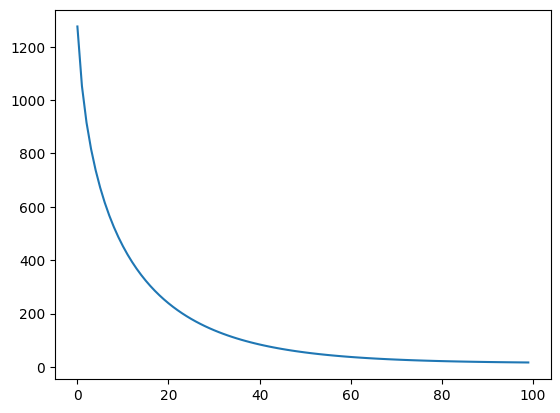

In [27]:
sns.lineplot(losses)
plt.show()

**학습 방법 2: fit 메소드를 통한 학습**

compile ~ fit 루틴

compile: 모델 학습에 필요한 설정을 합니다.

fit: 데이터셋에 대한 학습 작업을 수행시킵니다.

In [28]:
# lr_model을 학습하기 위한 설정을 합니다.
lr_model = LRModel()

lr_model.compile(
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=2), # 최적화 알고리즘을 셋팅합니다: Adaptive Gradient Descent
    loss= tf.keras.losses.MeanSquaredError(), # 손실함수를 설정합니다.
    metrics='mse' # mse: Mean Squared Error 모델 성능 측정지표를 성정합니다.
)

# epochs: 최적화 루팅 반복 회수, 100회
# verbose: 0 - 중간 결과 출력을 생략합니다.
# 확습을 시킵니다.
hist = lr_model.fit(ds, epochs=100, verbose=0)

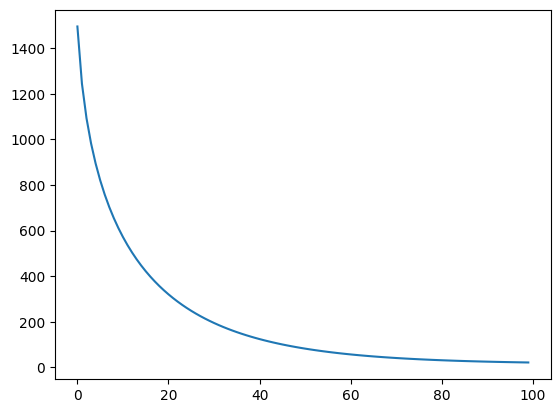

In [29]:
# 최적화 epoch 별 모델 성능(mse)를 출력합니다.
sns.lineplot(hist.history['mse'])
plt.show()

**Gradient Descent의 의미**

1. Loss에 대한 모수의 기울기만 구할 있다면,  모든 모수 모델에 대하여 적용이 가능합니다.

2. 데이터 스트림을 통한 학습이 가능합니다. 
  
  > 대규모의 학습 데이터를 입력으로 사용 가능합니다.

**Tensorflow**

모수적 모델을 정의하고 이를 학습 / 예측하기 위한 프레임웤입니다.

※ 이후 중점적으로 사용할 도구인 만큼 Toy셋을 통해 감을 익혀갑니다.

#### 예제: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자별 영화 평점을 예측기를 만들어 봅시다. 

학습데이터:평가데이터 = 8:2

검증법: 5겹 교차검증(5-fold cross validation)

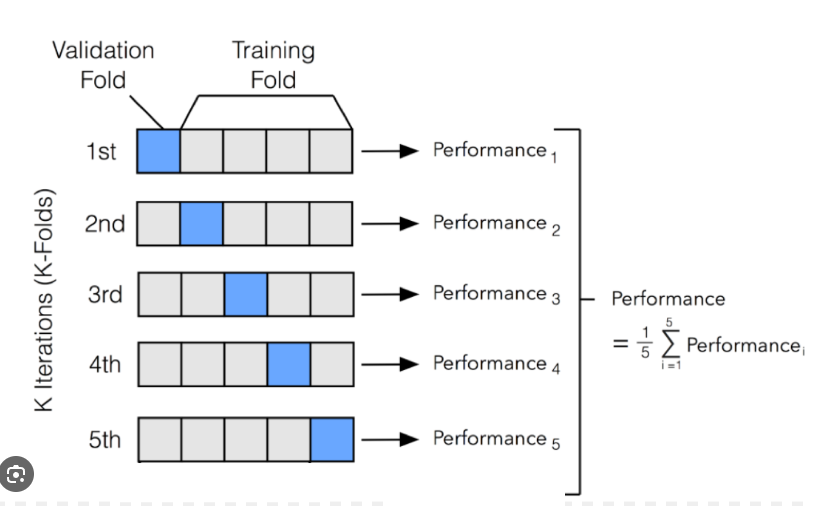

**선형 회귀**모델을 이용한 초간단 모델을 만들어 봅니다.

입력변수: 사용자의 rating 평균, 영화의 rating 평균

train / test 


train => 여러가지 모델 검증을 합니다.  =>  검증 단계에서, 성능 좋은 고릅니다. => train 선택된 모델을 학습


=> test를 가지고 평가를 합니다.

In [30]:
from sklearn.model_selection import train_test_split
# df_ratings를 학습:평가 = 8:2 비율로 나눕니다. 
df_train, df_test = train_test_split(df_ratings, train_size=0.8, random_state=123)
df_train.shape, df_test.shape

((80000, 4), (20000, 4))

In [31]:
df_train.head()

,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


In [32]:
df_test.head()

,user id,item id,rating,date
42083,600,651,4,1998-02-26 00:04:52
71825,607,494,5,1998-01-04 02:05:56
99535,875,1103,5,1997-10-10 06:32:24
47879,648,238,3,1997-12-15 19:18:55
36734,113,273,4,1997-10-04 03:26:49


In [33]:
df_train_5 = df_train.iloc[:5]
df_train_5

,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


In [35]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
cv = KFold(5)
cnt = 1
reg_lr = make_pipeline( # 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
    TargetEncoder(target_type='continuous', cv=2), # 범주형 변수의 수준별 Target(Rating)의 평균으로 인코딩
    LinearRegression() # 선형 회귀 모델 
)
X_lr = ['user id', 'item id']
reg_lr.fit(df_train[X_lr], df_train['rating'])
scores = list()
for train_idx, test_idx in cv.split(df_train_5):
    df_cv_train = df_train_5.iloc[train_idx] # 검증 학습셋
    print("검정 학습셋: {}".format(cnt))
    display(df_cv_train)
    reg_lr.fit(df_cv_train[X_lr], df_cv_train['rating'])

    print("검정  테스트셋: {}".format(cnt))
    df_cv_test = df_train_5.iloc[test_idx] # 검증 테스트셋
    prd = reg_lr.predict(df_cv_test[X_lr]) # 예측합니다.
    display(df_cv_test)
    score = mean_squared_error(df_cv_test['rating'], prd) # 지표 측정합니다.
    scores.append(score)
    print('Validation #{}, MSE: {:.5}'.format(cnt, score)) # 검정 라운드별 성능을 출혁합니다.
    cnt += 1
print(scores, np.mean(scores))

검정 학습셋: 1


,user id,item id,rating,date
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 1


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29


Validation #1, MSE: 1.0
검정 학습셋: 2


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 2


,user id,item id,rating,date
49609,480,511,4,1998-03-29 21:56:39


Validation #2, MSE: 0.0625
검정 학습셋: 3


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
96385,892,196,4,1998-02-04 16:27:02
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 3


,user id,item id,rating,date
89251,916,746,3,1997-11-29 22:57:42


Validation #3, MSE: 1.0
검정 학습셋: 4


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
17569,90,83,5,1998-03-31 22:34:47


검정  테스트셋: 4


,user id,item id,rating,date
96385,892,196,4,1998-02-04 16:27:02


Validation #4, MSE: 0.0625
검정 학습셋: 5


,user id,item id,rating,date
22302,429,24,3,1997-12-17 19:18:29
49609,480,511,4,1998-03-29 21:56:39
89251,916,746,3,1997-11-29 22:57:42
96385,892,196,4,1998-02-04 16:27:02


검정  테스트셋: 5


,user id,item id,rating,date
17569,90,83,5,1998-03-31 22:34:47


Validation #5, MSE: 2.25
[0.9999999999999991, 0.0625, 1.0, 0.0625, 2.2500000000000013] 0.875


In [36]:
from sklearn.model_selection import cross_validate
# 위의 루틴이 구현한 함수입니다. cross_validate
cross_validate(
    reg_lr, # 평
    df_train_5[X_lr],
    df_train_5['rating'],
    cv=cv,
    scoring='neg_mean_squared_error'
)

{'fit_time': array([0.00627232, 0.00237966, 0.002424  , 0.00209332, 0.00242519]),
 'score_time': array([0.00203919, 0.00120831, 0.00086951, 0.00102186, 0.00083566]),
 'test_score': array([-1.    , -0.0625, -1.    , -0.0625, -2.25  ])}

In [37]:
# 모델 검증 프로세스부터 구현합니다!!!
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

# 5겹의 교차 검증 Splitter를 준비합니다.
cv = KFold(n_splits=5, random_state=123, shuffle=True) 
def eval_model(reg_model, df, X):
    """
    모델의 성능 검증 루틴입니다.
    Parameters:
        df: pd.DataFrame
            데이터셋
        X: list[str]
            입력변수 리스트
    Returns:
        교차검증결과
    """
    return cross_validate(
        reg_model, 
        df[X], df['rating'], cv=cv, scoring='r2', return_train_score=True
    )

In [38]:
from sklearn.preprocessing import TargetEncoder
# 사용자의 rating 평균, 영화의 rating 평균으로 인코딩해줍니다.
tgt = TargetEncoder(target_type='continuous')
tgt.fit(df_train[['user id', 'item id']], df_train['rating'])
# user id, item id 별 target(rating)에 대한 평균으로 변환됩니다.
tgt.transform(df_train[['user id', 'item id']])

array([[3.39303134, 3.43011389],
       [3.72487552, 4.23383989],
       [3.38681329, 3.62972923],
       ...,
       [3.2430435 , 4.14358384],
       [3.71696198, 4.46338322],
       [3.2430435 , 3.78169614]])

In [74]:
df_train['user id'].nunique(), df_train['item id'].nunique()

(943, 1647)

In [70]:
df_train.groupby('user id')['rating'].transform('mean')[:3]

22302    3.392749
49609    3.727273
89251    3.386454
Name: rating, dtype: float64

In [ ]:
df_train.groupby('item id')['rating'].transform('mean')[:3]

In [40]:
from sklearn.preprocessing import OneHotEncoder
# 반면 OneHot 인코더는 범주형 변수의 수준만큼 변수를 만들어냅니다.
ohe = OneHotEncoder(sparse_output=False)
X_ohe = ohe.fit_transform(df_train[['user id', 'item id']])
X_ohe[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
# 실제 입력 변수는 2개이지만, 수준의 합만큼의 변수를 만들고 1(Hot)인 수는 입력변수 만큼입니다.
X_ohe.shape, np.sum(X_ohe, axis=1)[:5]

((80000, 2590), array([2., 2., 2., 2., 2.]))

In [44]:
reg_lr_tgt = make_pipeline( # 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
    TargetEncoder(target_type='continuous'), # 범주형 변수의 수준별 Target(Rating)의 평균으로 인코딩
    LinearRegression() # 선형 회귀 모델 
)
result_tgt = eval_model(reg_lr_tgt, df_train, ['user id', 'item id'])
result_tgt, np.mean(result_tgt['test_score'])

({'fit_time': array([0.03649974, 0.06941009, 0.06401157, 0.0647223 , 0.06479001]),
  'score_time': array([0.00537443, 0.01356721, 0.00744104, 0.00739551, 0.00742865]),
  'test_score': array([0.27155589, 0.27543624, 0.27216794, 0.26486013, 0.28174167]),
  'train_score': array([0.32304118, 0.3221079 , 0.32282782, 0.32356252, 0.32019925])},
 0.27315237408470194)

In [45]:
reg_lr_ohe = make_pipeline( # 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
    OneHotEncoder(drop='first', handle_unknown='ignore'), #  OneHotEncoder, 선형회귀 모델은 drop='first' 필요
    LinearRegression() # 선형 회귀 모델 
)
result_ohe = eval_model(reg_lr_ohe, df_train, ['user id', 'item id'])
result_ohe, np.mean(result_ohe['test_score'])

/home/multicampus/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/multicampus/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/multicampus/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/multicampus/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/multicampus/.local/lib/python3.11/site-packages/sk

({'fit_time': array([0.28595328, 0.1668644 , 0.23356891, 0.1774888 , 0.17118883]),
  'score_time': array([0.01830602, 0.01358843, 0.01365018, 0.01781201, 0.01582623]),
  'test_score': array([0.28795111, 0.29009013, 0.28802192, 0.28457031, 0.29605311]),
  'train_score': array([0.35288361, 0.35203302, 0.35290813, 0.35338584, 0.34996948])},
 0.2893373152305244)

In [46]:
# 위 과정을 수동으로 구하여 넣어줍니다.
df_train_mean = df_train.assign(
    user_id_mean = df_train.groupby('user id')['rating'].transform('mean'),
    item_id_mean = df_train.groupby('item id')['rating'].transform('mean')
)

In [47]:
reg_lr_mean = LinearRegression() # 선형 회귀 모델
result_mean = eval_model(reg_lr_mean, df_train_mean, ['user_id_mean', 'item_id_mean'])
result_mean, np.mean(result_mean['test_score'])

({'fit_time': array([0.00681043, 0.01061249, 0.01075649, 0.0107429 , 0.00943851]),
  'score_time': array([0.00958133, 0.00353527, 0.00369525, 0.01224232, 0.00366688]),
  'test_score': array([0.31608035, 0.32183405, 0.31761742, 0.31227918, 0.32951272]),
  'train_score': array([0.32041141, 0.318958  , 0.32003185, 0.32136307, 0.31706177])},
 0.31946474225901395)

In [48]:
df_train.groupby('user id')['rating'].agg('mean').head()

user id
1    3.638009
2    3.750000
3    2.725000
4    4.200000
5    2.914286
Name: rating, dtype: float64

In [49]:
rating_mean = df_train['rating'].mean()
df_test_mean = df_test.assign(
    user_id_mean = lambda x: x['user id'].map(df_train.groupby('user id')['rating'].agg('mean')).fillna(rating_mean),
    item_id_mean = lambda x: x['item id'].map(df_train.groupby('item id')['rating'].agg('mean')).fillna(rating_mean)
)

In [50]:
from sklearn.metrics import r2_score
reg_lr_tgt.fit(df_train[['user id', 'item id']], df_train['rating'])
print(
    'tgt', r2_score(df_test['rating'], reg_lr_tgt.predict(df_test[['user id', 'item id']]))
)
reg_lr_ohe.fit(df_train[['user id', 'item id']], df_train['rating'])
print(
    'ohe', r2_score(df_test['rating'], reg_lr_ohe.predict(df_test[['user id', 'item id']]))
)
reg_lr_mean.fit(df_train_mean[['user_id_mean', 'item_id_mean']], df_train_mean['rating'])
print(
    'mean', r2_score(df_test_mean['rating'], reg_lr_mean.predict(df_test_mean[['user_id_mean', 'item_id_mean']]))
)

tgt 0.27524365042696797
ohe 0.2945509586497558
mean 0.2738418209165743


/home/multicampus/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**검증 결과 수동으로 평균을 구한 결과가 더 검증 성능이 좋습니다** 
> 누수 현상(Data Leakage)에 의해 검증 성능이 결과가 더 좋아진 것입니다.

> 실제 test 셋에서 Data Leakage를 고려한다면 많이 떨어질 것으로 예상됩니다.

In [51]:
reg_lr = make_pipeline( # 전처리기와 모델을 결합하여 하나의 모델 객체로 구성합니다.
    TargetEncoder(target_type='continuous'), # 범주형 변수의 수준별 Target(Rating)의 평균으로 인코딩
    LinearRegression() # 선형 회귀 모델 
)
X_lr = ['user id', 'item id']
reg_lr.fit(df_train[X_lr], df_train['rating'])
r2_score(df_test['rating'], reg_lr.predict(df_test[X_lr]))

0.27520953319604746

In [52]:
df_test_mean = df_test.assign( # df_train에서 구한 통계정보로 test의 user_id_mean, item_id_mean을 구합니다.
    user_id_mean = df_test['user id'].map(
        df_train.groupby('user id')['rating'].agg('mean')
    ).fillna(df_train['rating'].mean()), # 결측치는 전체 평점으로 채웁니다.
    item_id_mean = df_test['item id'].map(
        df_train.groupby('item id')['rating'].agg('mean')
    ).fillna(df_train['rating'].mean()) # 결측치는 전체 평점으로 채웁니다.
)
reg_lr = LinearRegression()
X_lr = ['user_id_mean', 'item_id_mean']
reg_lr.fit(df_train_mean[X_lr], df_train_mean['rating'])
r2_score(df_test_mean['rating'], reg_lr.predict(df_test_mean[X_lr]))

0.2738418209165743

**실습**

사용자의 직업, 성별과 영화 장르 정보를 입력 변수에 추가하여 rating  예측 모델의 기능을 추가해봅니다

직업과 성별은 OneHotEncoder를 사용합니다. 

그리고 장르는 정르의 해당 여부를 그대로 전달합니다.

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [54]:
# 사용자 Metadata(df_user) 영화의 Metadata(df_movie)를 결합하여 활용해봅니다.
df_train_2 = df_train.join(df_user, on='user id').join(df_movie, on='item id')
df_test_2 = df_test.join(df_user, on='user id').join(df_movie, on='item id')

In [55]:
df_train_2.head()

,user id,item id,rating,date,age,gender,occupation,zip code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
22302,429,24,3,1997-12-17 19:18:29,27,M,student,29205,Rumble in the Bronx (1995),23-Feb-1996,...,0,0,0,0,0,0,0,0,0,0
49609,480,511,4,1998-03-29 21:56:39,57,M,retired,98257,Lawrence of Arabia (1962),01-Jan-1962,...,0,0,0,0,0,0,0,0,1,0
89251,916,746,3,1997-11-29 22:57:42,27,M,engineer,N2L5N,Real Genius (1985),01-Jan-1985,...,0,0,0,0,0,0,0,0,0,0
96385,892,196,4,1998-02-04 16:27:02,36,M,other,45243,Dead Poets Society (1989),01-Jan-1989,...,0,0,0,0,0,0,0,0,0,0
17569,90,83,5,1998-03-31 22:34:47,60,M,educator,78155,Much Ado About Nothing (1993),01-Jan-1993,...,0,0,0,0,0,1,0,0,0,0


In [56]:
X_genre = df_movie.columns[2:].tolist()

# ColumnTransformer -변수별 인코딩 방법을 달리 구성하여 처리 단계를 만듭니다.
ct = ColumnTransformer([
    ('tgt', TargetEncoder(target_type='continuous'), ['user id', 'item id']), # Target Encoder를 통해 user id, item id에 대한 평균으로 인코딩합니다.
    ('ohe', OneHotEncoder(drop='first'), ['gender', 'occupation']), # 직업, 성별은 가변수화 합니다.
    ('pt', 'passthrough', X_genre) # Genre 여부는 그대로 모델에 전달합니다.
])
# ColumnTransformer와 LinearRegression을 연결합니다.
reg_lr_2 = make_pipeline(ct, LinearRegression())
X_lr_2 = ['user id', 'item id', 'occupation', 'gender'] + X_genre
result = eval_model(reg_lr_2, df_train_2, X_lr_2)
np.mean(result['test_score'])

0.2757014442617541

In [57]:
reg_lr_2.fit(df_train_2[X_lr_2], df_train_2['rating'])
r2_score(df_test_2['rating'], reg_lr_2.predict(df_test_2[X_lr_2]))

0.2771785799076696

## 로지스틱 회귀 (Logistic Regression Model)

선형 회귀 모델로 로지스틱 함수를 통해 \[0, 1\] 실수 영역을 예측하도록 한 선형 모델

로짓 함수: [0, 1] 확률 영역의 실수를 [-∞, ∞]로 변환해주는 함수

  > $logit(p)= \log(\frac{p}{1-p})$

로지스틱 함수: [-∞, ∞] 실수를 [0, 1] 확률 영역의 실수로 변환해주는 함수: 로짓함수의 역함수

  > $logistic(x)= \frac{1}{1 + e^{-x}}$

SoftMax 함수: 다중클래수 분류를 위한 링크(link)함수

  > $softmax(x_i) = \frac{e^{x_i}}{\sum_j{e^{x_j}}}$, x_i는 i클래스의 로짓

손실 함수: Cross Entropy

  $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i)$

  $H(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$(이진 분류)
  
학습 알고리즘: 경사하강법

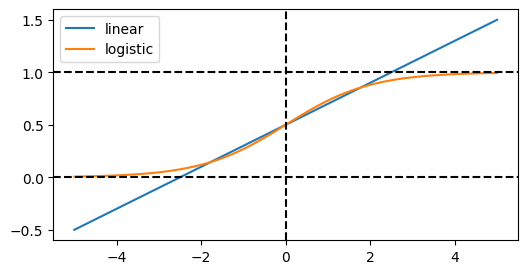

In [59]:
from scipy.special import expit
plt.figure(figsize=(6, 3))
x = np.linspace(-5, 5, 100)
sns.lineplot(x = x, y =  x / 5 + 0.5, label='linear')
sns.lineplot(x = x, y = expit(x), label='logistic')
plt.axvline(0, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='black', linestyle='--')
plt.show()

#### 예제: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자가 영화에 평점 여부를 맞추는 모델을 만듭니다.

지표: AUC(Area Under of ROC Curve)

학습데이터:평가데이터 = 8:2

검증법: 5-fold cross validation

**로지스틱 회귀**분석을 이용한 초간단 모델을 만들어 봅니다.

입력변수: 사용자의 rating을 한 비율, 영화의 rating을 받은 비율

In [60]:
# 1. user id와 item id를 cross tab을 하여 사용자별 평가 내역이 있으면 1, 없으면 0인 DataFrame을 만듭니다.
# 2. 이를 stack 하여 user id별 item id에 대한 시청 유무를 나타내는 데이터프레임으로 변환합니다.
df_ratings_yn = df_ratings.pivot(index='user id', columns='item id', values='rating')\
        .notna().stack().rename('yn').reset_index()
df_ratings_yn.head()

,user id,item id,yn
0,1,1,True
1,1,2,True
2,1,3,True
3,1,4,True
4,1,5,True


In [61]:
df_ratings_yn.shape

(1586126, 3)

In [62]:
# 학습셋 8, 평가셋 2의 비율로 나눕니다.
df_train_yn, df_test_yn = train_test_split(df_ratings_yn, train_size=0.8, random_state=123)

In [63]:
df_ratings_yn['yn'].value_counts(normalize=True)

yn
False    0.936953
True     0.063047
Name: proportion, dtype: float64

In [64]:
# 모델 검증 프로 루틴입니다.
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import roc_auc_score

# 5겹 교차 검정을 세팅합니다.
cv = KFold(n_splits=5, random_state=123, shuffle=True)
def eval_model_yn(reg_model, df, X):
    return cross_validate(reg_model, df[X], df['yn'], scoring='roc_auc', cv=cv, return_train_score=True)

In [65]:
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

clf_lr_tgt = make_pipeline(
    TargetEncoder(), # Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    LogisticRegression() # LogisticRegression 모델을 설정합니다.
)
X_lr = ['user id', 'item id']
eval_model_yn(clf_lr_tgt, df_train_yn, X_lr)

{'fit_time': array([1.53107524, 1.54828477, 1.49455667, 1.58641911, 1.55036259]),
 'score_time': array([0.17126012, 0.17330003, 0.1754775 , 0.17623329, 0.17346168]),
 'test_score': array([0.87955675, 0.87720313, 0.87873666, 0.87959866, 0.87712377]),
 'train_score': array([0.88178244, 0.88188859, 0.8816551 , 0.88149132, 0.882076  ])}

In [66]:
clf_lr_ohe = make_pipeline(
    OneHotEncoder(drop='first'), # OneHotEncoder linear 계열 모델, drop='first'
    LogisticRegression() # LogisticRegression 모델을 설정합니다.
)
X_lr = ['user id', 'item id']
eval_model_yn(clf_lr_ohe, df_train_yn, X_lr)

/home/multicampus/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/multicampus/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([2.76144314, 2.89169216, 2.79590869, 2.73818851, 2.73224235]),
 'score_time': array([0.11799502, 0.12202263, 0.11777425, 0.12022066, 0.1182735 ]),
 'test_score': array([0.89410601, 0.89328406, 0.89370656, 0.89511047, 0.89272095]),
 'train_score': array([0.89855989, 0.89859475, 0.89839565, 0.89818854, 0.89877897])}

In [67]:
from sklearn.metrics import roc_auc_score
# 둘의 실제 성능을 뽑아봅니다.
clf_lr_tgt.fit(df_train_yn[X_lr], df_train_yn['yn'])
print('tgt', roc_auc_score(df_test_yn['yn'], clf_lr_tgt.predict_proba(df_test_yn[X_lr])[:, 1]))

clf_lr_ohe.fit(df_train_yn[X_lr], df_train_yn['yn'])
print('ohe', roc_auc_score(df_test_yn['yn'], clf_lr_ohe.predict_proba(df_test_yn[X_lr])[:, 1]))

tgt 0.8788631273993897
ohe 0.8934565664315273


/home/multicampus/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**실습**

사용자의 직업, 성별과 영화 장르 정보를 입력 변수에 추가하여 yn  예측 모델의 기능을 추가해봅니다.

In [68]:
# df_train_yn셋에 df_movie 정보를 포함 시킵니다.
df_train_yn_2 = df_train_yn.join(df_movie, on='item id').join(df_user, on='user id') 
# df_test_yn셋에 df_movie 정보를 포함 시킵니다.
df_test_yn_2 = df_test_yn.join(df_movie, on='item id').join(df_user, on='user id')

In [69]:
df_train_yn_2.head()

,user id,item id,yn,movie title,release date,unknown,Action,Adventure,Animation,Children's,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
1191215,709,360,False,Wonderland (1997),01-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,21,M,other,N4T1A
347585,207,1094,False,"Thin Line Between Love and Hate, A (1996)",03-Apr-1996,0,0,0,0,0,...,0,0,0,0,0,0,39,M,marketing,92037
728980,434,675,False,"Nosferatu (Nosferatu, eine Symphonie des Graue...",01-Jan-1922,0,0,0,0,0,...,0,0,0,0,0,0,16,F,student,49705
1558868,927,1337,False,Larger Than Life (1996),01-Nov-1996,0,0,0,0,0,...,0,0,0,0,0,0,23,M,programmer,55428
1305487,777,256,False,When the Cats Away (Chacun cherche son chat) (...,20-Jun-1997,0,0,0,0,0,...,0,1,0,0,0,0,63,M,programmer,01810


In [70]:
df_test_yn_2.head()

,user id,item id,yn,movie title,release date,unknown,Action,Adventure,Animation,Children's,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
921522,548,1469,False,Tom and Huck (1995),01-Jan-1995,0,0,1,0,1,...,0,0,0,0,0,0,51,M,writer,95468
1238488,737,537,False,My Own Private Idaho (1991),01-Jan-1991,0,0,0,0,0,...,0,0,0,0,0,0,30,M,programmer,98072
640861,382,20,False,Angels and Insects (1995),01-Jan-1995,0,0,0,0,0,...,0,1,0,0,0,0,45,M,engineer,01824
670487,399,1052,False,Dracula: Dead and Loving It (1995),01-Jan-1995,0,0,0,0,0,...,0,0,0,0,0,0,25,M,other,92374
1235043,735,456,False,Beverly Hills Ninja (1997),17-Jan-1997,0,1,0,0,0,...,0,0,0,0,0,0,29,F,healthcare,85719


In [71]:
X_genre = df_movie.columns[2:].tolist()
ct = ColumnTransformer([
    ('tgt', TargetEncoder(), ['user id', 'item id']),# Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    ('ohe', OneHotEncoder(drop='first'), ['occupation', 'gender']),# occupation, gender를 사전순으로 첫번째 수준을 제외 시키고 가변수화합니다.
    ('pt', 'passthrough', X_genre)# X_genre는 처리 없이 통과시킵니다.
])

reg_lr_2 = make_pipeline(
    ct, 
    LogisticRegression()
)
X_lr_2 = ['user id', 'item id', 'occupation', 'gender'] + X_genre
eval_model_yn(reg_lr_2, df_train_yn_2, X_lr_2)

{'fit_time': array([8.51865888, 9.19179201, 9.49097586, 9.51485276, 8.95818377]),
 'score_time': array([0.31672382, 0.31255746, 0.31930828, 0.31478167, 0.32721281]),
 'test_score': array([0.87790536, 0.87556493, 0.87677025, 0.87739887, 0.87572767]),
 'train_score': array([0.87997564, 0.88011876, 0.87971379, 0.87986652, 0.88012196])}

In [72]:
reg_lr_2.fit(df_train_yn_2[X_lr_2], df_train_yn_2['yn']) # 전체 Train셋에서 학습시킵니다.
# 테스트셋에 대한 평가를합니다.
roc_auc_score(df_test_yn_2['yn'], reg_lr_2.predict_proba(df_test_yn_2[X_lr_2])[:, 1])

0.8766564743401338

## 인공신경망(Artificial Neural Network)

- 신경세포를 본 딴 모수적 모델

> 선형 회귀 모델이 나타내지 못하는 패턴(Non-Linear 패턴)을 나타낼 수 있습니다.

> 층(Layer): 입력을 처리하여 변환하는 연속된 연산 단위 

> 은닉층 (Hidden Layer): 기본적으로 가중치와 활성화 구성

  유닛(Unit) - 은닉층의 노드수: 은닉층의 출력 변수의 수
 
  가중치(Weight) - 모수(Parameter)에 해당
  
  > 밀도레이어(Dense Layer):  $N_{input} × N_{output}$ 인 행렬
  
  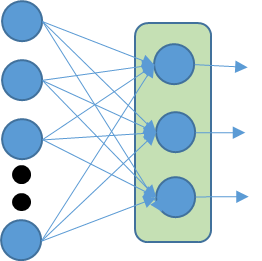
  
  활성화 함수(Activation Function)
  
  > 신경세포의 역치를 나타냄 - 신경세포에 전달된 자극이 다음 신경세포로 전달 되려면 일정 수준이상의 자극이 필요
  
  > 수학적으로는 비선형성을 부여
  
  > Ex) sigmoid / tanh / relu / leaky relu / ... 
  
  
- 학습 알고리즘: 경사하강법

[Tensorflow Playground](https://playground.tensorflow.org/)

#### 예제: MovieLens100K 데이터셋에서 추천에 활용할 수 있는 모델을 만들어 봅니다.

Task: 추천시 Ranking에 활용할 수 있도록 사용자별 영화 평점을 예측기를 만들어 봅시다. 

지표: R2

학습데이터:평가데이터 = 8:2

검증법: 5-fold cross validation

**인공신경망**모델을 이용한 초간단 모델을 만들어 봅니다.

입력변수: 사용자의 rating 평균, 영화의 rating 평균, 사용자의 직업, 성별과 영화 장르 정보를 입력 변수

In [73]:
# 사용자 Metadata(df_user) 영화의 Metadata(df_movie)를 결합하여 활용해봅니다.
df_train_2 = df_train.join(df_user, on='user id').join(df_movie, on='item id')
df_test_2 = df_test.join(df_user, on='user id').join(df_movie, on='item id')

In [74]:
from sklearn.neural_network import MLPRegressor
X_genre = df_movie.columns[2:].tolist()
ct = ColumnTransformer([
    ('tgt', TargetEncoder(target_type='continuous'), ['user id', 'item id']), # Target Encoder 시청율(yn인 비율)로 user id, item id를 인코딩합니다.
    ('ohe', OneHotEncoder(), ['occupation', 'gender']),# occupation, gender를 사전순으로 첫번째 수준을 제외 시키고 가변수화합니다.
    ('pt', 'passthrough', X_genre)# X_genre는 처리 없이 통과시킵니다.
])

reg_mlp = make_pipeline(
    ct, 
    MLPRegressor(
        hidden_layer_sizes=[16, 8], # 은닉층의 사이즈를 16, 8 로 합니다.
        activation='relu', # 활성화 함수는 ReLU로 합니다.
        learning_rate_init=0.001, # 초기 학습률은 0.001, 
        alpha=0.001, # L2 규제 계수는 0.001로합니다.
        random_state=123
    )
)
X_mlp = ['user id', 'item id', 'occupation', 'gender'] + X_genre
eval_model(reg_mlp, df_train_2, X_mlp)

{'fit_time': array([ 7.18044901,  6.81443286, 10.05865955,  9.82792568, 12.83892202]),
 'score_time': array([0.02882147, 0.01875448, 0.01841259, 0.01829028, 0.01857758]),
 'test_score': array([0.2739423 , 0.27943189, 0.27557974, 0.27362212, 0.28965419]),
 'train_score': array([0.32677015, 0.32510899, 0.33062692, 0.33175442, 0.32771235])}

In [ ]:
from sklearn.neural_network import MLPRegressor
X_genre = df_movie.columns[2:].tolist()
ct = ColumnTransformer([
    (
        'ohe', 
        OneHotEncoder(handle_unknown='ignore'), 
        ['user id', 'item id', 'occupation', 'gender']
    ),# occupation, gender를 사전순으로 첫번째 수준을 제외 시키고 가변수화합니다.
    ('pt', 'passthrough', X_genre)# X_genre는 처리 없이 통과시킵니다.
])

reg_mlp_2 = make_pipeline(
    ct, 
    MLPRegressor(
        hidden_layer_sizes=[16, 8], # 은닉층의 사이즈를 16, 8 로 합니다.
        activation='relu', # 활성화 함수는 ReLU로 합니다.
        learning_rate_init=0.001, # 초기 학습률은 0.001, 
        alpha=0.001, # L2 규제 계수는 0.001로합니다.
        random_state=123
    )
)
X_mlp = ['user id', 'item id', 'occupation', 'gender'] + X_genre
eval_model(reg_mlp_2, df_train_2, X_mlp)


**Embedding**: 복잡도가 문장, 이미지, 음성, 고차원의 범주 등 복잡도가 높은 형태의 데이터를 저 차원의 연속형 변수로 나타낸 데이터


이번에는 user id와 item id를 대상 변수의 비율/평균으로 인코딩하는 것이 아닌, 임베딩으로 인코딩을 해봅니다. 

이를 위해 Tensorflow를 사용해보겠습니다.


**Rating 예측 Neural Networks Architecture**

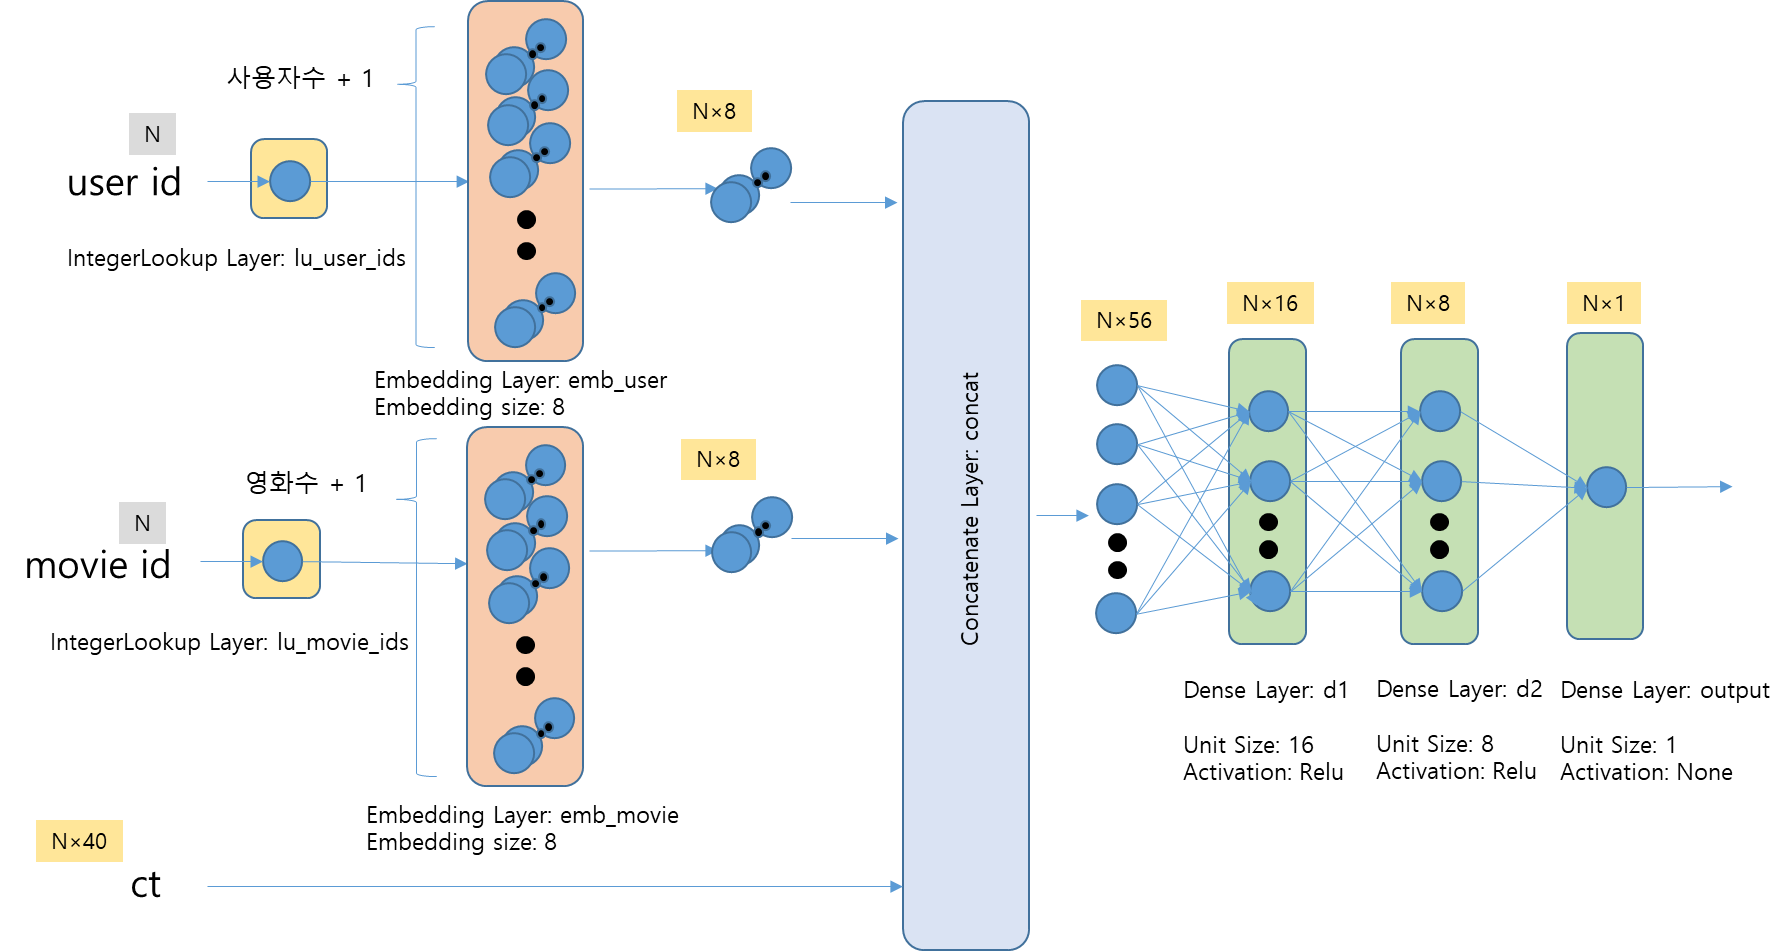

N: 배치 사이즈(batch size)

ct: 사용자 직업, 성별 가변수와 영화의 장르 여부 데이터

In [200]:
# IntegerLookup의 기능을 확인합니다.
# vocabulary에 정의된 변수대로, 입력 변수를 위치 인덱스로 변환해줍니다.
# vocabulary에 없는 수에 대해서는 0을 변환해줍니다.
lu_user_id = tf.keras.layers.IntegerLookup(
    vocabulary=[100, 200, 300]
)
lu_user_id(tf.constant([100, 200, 1, 300]))

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 2, 0, 3])>

In [76]:
lu_user_id = tf.keras.layers.IntegerLookup(vocabulary=tf.constant(df_user.index))
emb_user = tf.keras.layers.Embedding(df_user.index.nunique() + 1, 8) # OOV(Out-of Vocabulary)를 고려해서 + 1을 해줍니다.
lu_movie_id = tf.keras.layers.IntegerLookup(vocabulary=tf.constant(df_movie.index))
emb_movie = tf.keras.layers.Embedding(df_movie.index.nunique() + 1, 8)

cc = tf.keras.layers.Concatenate(axis=1) # 결합 레이어를 생성합니다.

user_iloc = lu_user_id(tf.constant([3, 3, 5])) # 위치 인덱스를 가져옵니다 → 인덱스에 해당하는 임베딩을 가져옵니다.
movie_iloc = lu_movie_id(tf.constant([1, 2, 3])) 
cc([emb_movie(movie_iloc), emb_user(user_iloc)]) # 두 개의 임베딩을 하나로 결합해줍니다.

<tf.Tensor: shape=(3, 16), dtype=float32, numpy=
array([[-0.03469398, -0.03922371, -0.02491456,  0.00320264,  0.02842638,
         0.01598373,  0.04374153, -0.01948618,  0.0199929 ,  0.03936005,
         0.03149413,  0.02982252,  0.00102098,  0.00036061, -0.04401514,
        -0.03996135],
       [-0.04958997,  0.02238147, -0.03833001, -0.00497564, -0.04921616,
         0.03918684,  0.04375373, -0.04285575,  0.0199929 ,  0.03936005,
         0.03149413,  0.02982252,  0.00102098,  0.00036061, -0.04401514,
        -0.03996135],
       [-0.00086399,  0.01651921,  0.01733694, -0.04070868, -0.00922013,
        -0.00739362, -0.0337853 ,  0.04195482,  0.03188105, -0.00482023,
         0.0472116 , -0.04847175, -0.01714347, -0.03035238, -0.03947134,
         0.02412856]], dtype=float32)>

**Tensorflow를 통한 Rating 예측 모델 구현**

In [77]:
class RatingModel(tf.keras.Model):
    def __init__(self, user_ids, movie_ids):
        super().__init__()
        # user id들을 사전으로 구성하여 user id를 입력을 받아 이를 1부터 시작하는 인덱스로 변환해주는 Layer를 생성합니다. OOV: 0
        self.lu_user_ids = tf.keras.layers.IntegerLookup(
            vocabulary=tf.constant(user_ids)
        )
        # 사용자 임베딩을 생성합니다. OOV를 포함하여 사용자수 + 1입니다.
        self.emb_user = tf.keras.layers.Embedding(len(user_ids) + 1, 8)
        
        # movie id들을 사전으로 구성하여 user id를 입력을 받아 이를 1부터 시작하는 인덱스로 변환해주는 Layer를 생성합니다. OOV: 0
        self.lu_movie_ids = tf.keras.layers.IntegerLookup(
            vocabulary=tf.constant(movie_ids)
        )
        # 영화 임베딩을 생성합니다.
        self.emb_movie = tf.keras.layers.Embedding(len(movie_ids) + 1, 8)
        
        # Concatenate Layer
        self.concat = tf.keras.layers.Concatenate(axis=1)
        
        # Dense Layer 1
        self.d1 = tf.keras.layers.Dense(16)
        # Dense Layer 2 
        self.d2 = tf.keras.layers.Dense(8)
        # Logit Layer
        self.o = tf.keras.layers.Dense(1)
    
    def call(self, X, training=False):
        x_user = self.lu_user_ids(X['user_id']) # 사용자 ID에서 임베딩 인덱스로 변환합니다. X['user_id'] N 정수 / x_user: N 정수
        x_user = self.emb_user(x_user) # x_user에 해당하는 임베딩을 반환합니다. x_user: N×8 정수
        x_movie = self.lu_movie_ids(X['movie_id']) # 영화 ID에서 임베딩 인덱스로 변환합니다. X['movie_id'] N 정수 / x_movie: N 정수
        x_movie = self.emb_movie(x_movie) # x_movie에 해당하는 임베딩을 반환합니다. x_movie: N×8 정수
        x = self.concat([x_user, x_movie, X['ct']])# To-Do-With x_user, x_movie, X['ct']을 결합합니다. X['ct']: N×40, x: N×56
        x = self.d1(x) # d1레이를 통과시킵니다 x: N×16
        x = self.d2(x) # d2레이어를 통과시킵니다. x: N×8
        return self.o(x) # x: 출력층을 맏듭니다. N×1

In [80]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
# 5-fold cross validation을 합니다.

# Genre와 직업, 성별을 변환기를 설정합니다.
ct = ColumnTransformer([
    ('pt', 'passthrough', X_genre),
    ('ohe', OneHotEncoder(drop='first'), ['occupation', 'gender']),
])
ct.fit(df_train_2)
print("ct values size: {}".format(len(ct.get_feature_names_out())))
ct_cols = X_genre.tolist() + ['occupation', 'gender']

cv = KFold(5)
train_scores_, valid_scores_ =  [], []
for train_idx, test_idx in cv.split(df_train_2):
    tf.keras.backend.clear_session()
    df_cv_train = df_train_2.iloc[train_idx]
    df_cv_test = df_train_2.iloc[test_idx]
    reg_nn_rating = RatingModel(
        # df_train_2에 등장한 user id 중에서 출현빈도가 5건 이상만 전달합니다.
        df_cv_train['user id'].value_counts().pipe(lambda x: x.loc[x >= 5].index), 
        # df_train_2에 등장한  item id 중에서 출현빈도가 5건 이상만 전달합니다.
        df_cv_train['item id'].value_counts().pipe(lambda x: x.loc[x >= 5].index)
    )
    reg_nn_rating.compile(
        optimizer= tf.keras.optimizers.Adam(), # Adam Optimizer를 사용합니다.
        loss= tf.keras.losses.MeanSquaredError()# MSE로 설정합니다.
    )
    # ({'user_id': df_train_2.iloc[train_idx]['user id'] , 'movie_id': ~['item id'], 'ct': genre와 직업 성별 전처리 데이터}, rating) 구조의
    # Tensorflow Dataset을 만들고
    # shuffle 10000, batch 128의 과정을 설정합니다.
    ds_train_2 = tf.data.Dataset.from_tensor_slices(({
        'user_id': df_cv_train['user id'],
        'movie_id': df_cv_train['item id'],
        'ct': ct.transform(df_cv_train[ct_cols])
    }, df_cv_train['rating'])).shuffle(10000).batch(128)

    # ({'user_id': df_train_2.iloc[test_idx]['user id'] , 'movie_id': ~['item id'], 'ct': genre와 직업 성별 전처리 데이터}, rating) 구조의
    # Tensorflow Dataset을 만들고
    # batch 128의 과정을 설정합니다.
    ds_valid_2 = tf.data.Dataset.from_tensor_slices(({
        'user_id': df_cv_test['user id'],
        'movie_id': df_cv_test['item id'],
        'ct': ct.transform(df_cv_test[ct_cols])
    }, df_cv_test['rating'])).batch(128)
    
    reg_nn_rating.fit(ds_train_2, validation_data=ds_valid_2, epochs=10)
    # r2_score를 valid_score_에 기록합니다.
    valid_scores_.append(
        r2_score(
            df_cv_test['rating'], 
            reg_nn_rating.predict(ds_valid_2)
        )
    )
del ds_train_2, ds_valid_2
valid_scores_, np.mean(valid_scores_)

ct values size: 40
Epoch 1/10
500/500 [==============================] - 10s 16ms/step - loss: 1.8035 - val_loss: 0.9253
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 0.8907 - val_loss: 0.9046
Epoch 3/10
500/500 [==============================] - 4s 7ms/step - loss: 0.8761 - val_loss: 0.9017
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 0.8723 - val_loss: 0.9011
Epoch 5/10
500/500 [==============================] - 3s 7ms/step - loss: 0.8681 - val_loss: 0.8986
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 0.8655 - val_loss: 0.8977
Epoch 7/10
500/500 [==============================] - 3s 7ms/step - loss: 0.8638 - val_loss: 0.8961
Epoch 8/10
500/500 [==============================] - 3s 5ms/step - loss: 0.8607 - val_loss: 0.8977
Epoch 9/10
500/500 [==============================] - 3s 6ms/step - loss: 0.8604 - val_loss: 0.8972
Epoch 10/10
125/125 [==============================] - 0s 3ms/step
Epoch 1/10
5

[0.29296012608726385,
 0.29324861503960586,
 0.2865914140303869,
 0.2902699998108361,
 0.2961347090399856]

In [53]:
# Train에 학습하고 Test로 평가합니다.

# 전처리를 합니다.
ct = ColumnTransformer([
    ('pt', 'passthrough', X_genre),
    ('ohe', OneHotEncoder(drop='first'), ['occupation', 'gender']),
])
ct.fit(df_train_2)

tf.keras.backend.clear_session()
reg_nn_rating = RatingModel(
    df_train_2['user id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.tolist()), 
    df_train_2['item id'].value_counts().pipe(lambda x: x.loc[x >= 5].index.tolist())
)
reg_nn_rating.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.MeanSquaredError(),
)

# ({'user_id': df_train_2['user id'] , 'movie_id': ~['item id'], 'ct': genre와 직업 성별 전처리 데이터}, rating) 구조의
# Tensorflow Dataset을 만들고
# shuffle 10000, batch 128의 과정을 설정합니다.
ds_train_2 = tf.data.Dataset.from_tensor_slices(({
    'user_id': df_train_2['user id'],
    'movie_id': df_train_2['item id'],
    'ct': ct.transform(df_train_2[ct_cols])
}, df_train_2['rating'])).shuffle(10000).batch(128)

# ({'user_id': df_train_2.iloc[test_idx]['user id'] , 'movie_id': ~['item id'], 'ct': genre와 직업 성별 전처리 데이터}, rating) 구조의
# Tensorflow Dataset을 만들고
# batch 128의 과정을 설정합니다.
ds_test_2 = tf.data.Dataset.from_tensor_slices({
    'user_id': df_test_2['user id'],
    'movie_id': df_test_2['item id'],
    'ct': ct.transform(df_test_2[ct_cols])
}).batch(128)

# ds_train_2로 reg_nn_rating을 학습을 시킵니다. 
# 검증셋을로 ds_test_2를 사용합니다.
# epochs는 10으로 합니다. 
reg_nn_rating.fit(ds_train_2, epochs=10)
# df_test2에 대한 reg_nn_rating의 r2_score를 구합니다.
r2_score(
    df_test_2['rating'], 
    reg_nn_rating.predict(ds_test_2)
)

Epoch 1/10
625/625 [==============================] - 9s 13ms/step - loss: 2.1243 - val_loss: 0.0000e+00
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8894 - val_loss: 0.0000e+00
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8785 - val_loss: 0.0000e+00
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.8730 - val_loss: 0.0000e+00
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8685 - val_loss: 0.0000e+00
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8670 - val_loss: 0.0000e+00
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8649 - val_loss: 0.0000e+00
Epoch 8/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8627 - val_loss: 0.0000e+00
Epoch 9/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8616 - val_loss: 0.0000e+00
Epoch 10/10
157/157 [==============================] - 0s 2ms/s

0.2957032587138039

In [54]:
reg_nn_rating.summary()

Model: "rating_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 integer_lookup (IntegerLoo  multiple                  0         
 kup)                                                            
                                                                 
 embedding (Embedding)       multiple                  7552      
                                                                 
 integer_lookup_1 (IntegerL  multiple                  0         
 ookup)                                                          
                                                                 
 embedding_1 (Embedding)     multiple                  10328     
                                                                 
 concatenate (Concatenate)   multiple                  0         
                                                                 
 dense (Dense)               multiple                 

In [23]:
from tensorboard.plugins import projector
%load_ext tensorboard

In [ ]:
log_dir='logs/nn/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# 임베딩의 메타데이터를 만듭니다.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for i in df_train_2['item id'].value_counts().pipe(lambda x: x.loc[x >= 5].index):
        f.write("{}\n".format(df_movie.loc[i, 'movie title']))

# 영화 임베딩을 생성합니다.
weights = tf.Variable(reg_nn_rating.emb_movie.get_weights()[0][1:])
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# 임베딩 프로젝터를 설정합니다.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [30]:
%tensorboard --logdir logs/nn/ --bind_all

# (비모수적 모델) Non-Parametric Model

## 결정 나무(Decision Tree)

 입력에 대한 판단 과정을 트리 구조로 나타낸 모델
 
 단말노드는 트리의 출력내용을 정의하고, 일반노드는 입력값에 대한 다음 자식 노드를 이동하기 위한 노드분기 조건을 나타냅니다.
 
 결정 나무는 학습셋에 있는 패턴을 나타내기 위해 트리 구조를 확장해 나가는 특징이 있어,
 
 트리의 크기를 제한하기 위한 설정을 하지 않으면 학습셋에 대하여 최고의 성능을 나타낼 수 있습니다.
 
 ⇒ 과적합이 쉽게 발생합니다.

# 앙상블 모델

- 일반화 성능 향상을 위해 여러 모델을 결합한 모델 

## Boosting 

- 이전까지 결합된 모델의 손실(Loss)을 줄이는 모델을 결합해가는 앙상블 기법

## Bagging 

- 모델의 변동성을 줄이기 위해 Boostrapping을 통하여 다수의 모델을 만들어 변동성 줄이는 앙상블 기법

like 변수를 rating이 사용자의 rating 평균 이상이면 True 아니면 False로 정의 합니다.

In [82]:
# like를 만듭니다.
df_train_3 = df_train.assign(
    like = df_train.groupby('user id')['rating'].transform('mean') > df_train['rating']
)
# Genre별 선호비율 조사하기위해 genre를 결합시킵니다.
X_genre = df_movie.columns[2:].tolist()
df_train_3 = df_train_3.join(df_movie[X_genre], on='item id')
df_train_3.head()

,user id,item id,rating,date,like,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
22302,429,24,3,1997-12-17 19:18:29,True,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49609,480,511,4,1998-03-29 21:56:39,False,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
89251,916,746,3,1997-11-29 22:57:42,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96385,892,196,4,1998-02-04 16:27:02,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17569,90,83,5,1998-03-31 22:34:47,False,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


사용자의 장르별 선호도를 사용자가 like를 한 비율을 측정하여 구합니다. like에 대한 기록이 없는 장르는 0으로 합니다.

In [83]:
# 사용자의 genre별 선호도를 구하여 입력 변수로 활용할 수 있게 like의 비율을 구합니다. 
df_like = df_train_3.groupby('user id')[X_genre].mean()

In [84]:
# 결합합니다.
df_train_3_like = df_train_3.join(df_like, on='user id', rsuffix='_mean')

**Light GBM으로 모델을 구성하여 성능을 평가해 봅니다**

In [85]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold
cv =KFold(5)
clf_lgb = lgb.LGBMClassifier(verbose=-1)
scores = cross_val_score(clf_lgb, 
    df_train_3_like[[i + '_mean' for i in X_genre]],
    df_train_3_like['like'],
    cv=cv,
    scoring='roc_auc'                         
)
scores

array([0.61525094, 0.62325222, 0.61001096, 0.61575168, 0.6226304 ])

In [86]:
clf_lgb.fit(
    df_train_3_like[[i + '_mean' for i in X_genre]],
    df_train_3_like['like']
)

LGBMClassifier(verbose=-1)

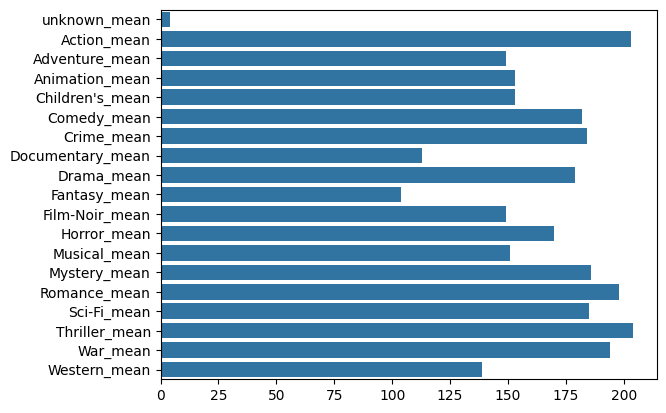

In [87]:
# 입력 변수별 중요로를 살펴 봅니다.
sns.barplot(
    x = clf_lgb.feature_importances_,
    y = [i + '_mean' for i in X_genre]
)
plt.show()

# 비지도 학습

- 군집화(Clustering ): 비슷한 속성을 지닌 데이터 포인트를 그룹화하는 과정

- 차원축소(Dimension Reduction): 정보의 손실을 최소화하여 데이터의 변수의 수를 줄이는 과정

**예제: 차원 축소 기법을 활용한 초간단 텍스트 마이닝**

영화 줄거리 데이터에서, Bag-of-words 모델 + TF-IDF 변환 + TruncatedSVD 모델을 이용한 텍스트 임베딩 추출

> Bag-of-words : 문서를 단어들의 출현 빈도로 나타냅니다.

> TF-IDF 변환: 단어 빈도수를 전체 문서들에서 두루 나오는 단어의 가중치를 낮추어 변환합니다.

> TruncatedSVD: 입력 변수의 수를 줄입니다.

→ LSA(Latent Semantic Allocation) model

In [90]:
with open('dataset/tmdb_movie_info_kr.pkl', 'rb') as f:
    movie_info_kr = pkl.load(f)

In [91]:
movie_info_kr[1]['overview']

'카우보이 인형 우디는 꼬마 주인인 앤디의 가장 사랑받는 장난감이다. 그러나 어느날 버즈라는 새로운 장난감이 등장한다.  버즈는 최신형 장난감으로 레이저 빔 등의 첨단장비를 갖추고 있으나, 버즈는 자신이 장난감임을 인식하지 못하고 자신이 우주에서 온 전사이며 자신이 갖춘 장비로 하늘을 날 수 있다고 믿고 있다. 버즈의 허상을 상처받지 않고 인식시켜 주려는 우디와 친구들. 그러나 뜻밖의 사고가 일어난다. 옆집 개에게 버즈가 납치당하고 이런 버즈를 구하기 위해 우디와 친구들은 구조대를 조직해 버즈를 구하러 가는데...'

한글 형태소 분석기: 어절에서 형태소 단위의 분리를 해주며, 이와 함께  형태소의 품사를 제공합니다.

[KIWI](https://github.com/bab2min/kiwipiepy)

In [92]:
# 한글 형태소 분석기: 형태소 분석기를 통해 어절에서 단어를 추출합니다. 

from kiwipiepy import Kiwi
from tqdm import tqdm
kiwi = Kiwi()

In [93]:
kiwi.analyze(movie_info_kr[1]['overview'])

[([Token(form='카우보이', tag='NNG', start=0, len=4),
   Token(form='인형', tag='NNG', start=5, len=2),
   Token(form='우디', tag='NNP', start=8, len=2),
   Token(form='는', tag='JX', start=10, len=1),
   Token(form='꼬마', tag='NNG', start=12, len=2),
   Token(form='주인', tag='NNG', start=15, len=2),
   Token(form='이', tag='VCP', start=17, len=1),
   Token(form='ᆫ', tag='ETM', start=17, len=1),
   Token(form='앤디', tag='NNP', start=19, len=2),
   Token(form='의', tag='JKG', start=21, len=1),
   Token(form='가장', tag='MAG', start=23, len=2),
   Token(form='사랑', tag='NNG', start=26, len=2),
   Token(form='받', tag='XSV', start=28, len=1),
   Token(form='는', tag='ETM', start=29, len=1),
   Token(form='장난감', tag='NNG', start=31, len=3),
   Token(form='이', tag='VCP', start=34, len=1),
   Token(form='다', tag='EF', start=35, len=1),
   Token(form='.', tag='SF', start=36, len=1),
   Token(form='그러나', tag='MAJ', start=38, len=3),
   Token(form='어느', tag='MM', start=42, len=2),
   Token(form='날', tag='NNG', st

조사(tag가 J로 시작) 어미(tag가 E로 시작), 접미사(tag X로 시작), 문장부호(tag S로 시작) 주격보어(VCP) 하는 단어들은 불용어 처리합니다.

In [94]:
words = [t.form for t in kiwi.tokenize(movie_info_kr[1]['overview']) if t.tag[0] not in ['J', 'E', 'X', 'S'] and t.tag != 'VCP']
words

['카우보이',
 '인형',
 '우디',
 '꼬마',
 '주인',
 '앤디',
 '가장',
 '사랑',
 '장난감',
 '그러나',
 '어느',
 '날',
 '버즈',
 '새롭',
 '장난감',
 '등장',
 '버즈',
 '최신',
 '장난감',
 '레이저',
 '빔',
 '등',
 '첨단',
 '장비',
 '갖추',
 '있',
 '버즈',
 '자신',
 '장난감',
 '인식',
 '못하',
 '자신',
 '우주',
 '오',
 '전사',
 '자신',
 '갖추',
 '장비',
 '하늘',
 '날',
 '수',
 '있',
 '믿',
 '있',
 '버즈',
 '허상',
 '상처',
 '받',
 '않',
 '인식',
 '주',
 '우디',
 '친구',
 '그러나',
 '뜻밖',
 '사고',
 '일어나',
 '옆집',
 '개',
 '버즈',
 '납치',
 '이런',
 '버즈',
 '구하',
 '위하',
 '우디',
 '친구',
 '구조대',
 '조직',
 '버즈',
 '구하',
 '가']

In [95]:
# 영화의 제목과 줄거리에서 불용어를 제외한 단어 추출 작업을
# 전체 영화를 대상으로 진행합니다.
doc_ids = []
docs = []
for k, v in tqdm(movie_info_kr.items()):
    words = [t.form for t in kiwi.tokenize(v['title']) if t.tag[0] not in ['J', 'E', 'X', 'S'] and t.tag != 'VCP']
    words += [t.form for t in kiwi.tokenize(v['overview']) if t.tag[0] not in ['J', 'E', 'X', 'S'] and t.tag != 'VCP']
    doc_ids.append(k)
    docs.append(words)

100%|████████████████████████████████████████████████████████████████████████████| 61571/61571 [02:29<00:00, 410.54it/s]


In [96]:
# 영화별로 추출한 단어 만으로 단어를 공백으로 구분하여 다시 결합시켜 하나의 문자열로 만듭니다. 
docs_str = [' '.join(i) for i in docs]

**CountVectorizer를 학습 시킵니다**

In [97]:
docs_str[1]

'쥬만지 년 공장 운영 아버지 밑 자라 열두 살 소년 앨런 어느 날 공장 신축 부지 이상 북소리 듣 소리 따라가 앨런 나무 만들 지 이상 게임 판 발견 마침 집 오 새라 함께 게임 하 앨런 그만 게임 마법 걸리 게임 판 속 흔적 없이 사라지 년 쥬디 피터 교통사고 부모 잃 고모 함께 살 위하 값 싸 커다랗 집 이사 오 어느 날 고모 직장 출근 나 뒤 두 아이 먼지 쌓이 다락방 들려오 이상 북소리 듣 되 북소리 이끌리 쥬디 피터 찾아내 것 쥬만지 게임 판 호기심 많 두 아이 게임 판 지시 따르 주사위 던지 지금껏 한 번 보 적 없 세계 만나 되 그 게임 그만두 하 자신 의지 상관없이 게임 계속'

In [98]:
# CountVectorizer: Bag of Words Model의 sklearn version 입니다.
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer(min_df=3) # 적어도 3개이상의 문서에 나온 단어들를 어휘에 포함시킵니다.
cnt_vec.fit(docs_str)

CountVectorizer(min_df=3)

In [99]:
vec = cnt_vec.transform([docs_str[0]])[0]
for k, l in zip(vec.data, cnt_vec.get_feature_names_out()[vec.indices]):
    print(l, k)

가장 1
갖추 2
구조대 1
구하 2
그러나 2
꼬마 1
납치 1
등장 1
뜻밖 1
레이저 1
못하 1
버즈 7
사고 1
사랑 1
상처 1
새롭 1
스토리 1
앤디 1
어느 1
옆집 1
우디 3
우주 1
위하 1
이런 1
인식 2
인형 1
일어나 1
자신 3
장난감 4
장비 2
전사 1
조직 1
주인 1
첨단 1
최신 1
친구 2
카우보이 1
토이 1
하늘 1
허상 1


TFIDF 변환을 통해 두루 나오는 단어의 가중치를 낮춰줍니다.

$tf(t, d)  = \frac{f_{t,d}}{\sum_{t'∈f_{f',d}}f_{t',d}}$

$idf(t, D) = \log{\frac{N}{|\{d∈D: t∈d\}|}}$

$tfidf(t, d, D) = tf(t,d)\cdot idf(t, D)$

In [100]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_tf = TfidfTransformer()

In [101]:
tfidf_tf.fit(cnt_vec.transform(docs_str))

TfidfTransformer()

CountVectorizer → TFIDF 를 거쳐나온 문서 Matrix의 사이즈는 |D|×|V| , |D|: 문서수 |D|=61571, |V|: 단어수, |V| = 22288

TruncatedSVD를  이용하여, 문서 Matrix의 사이즈를 축소시킵니다.

In [102]:
vec = tfidf_tf.transform(cnt_vec.transform([docs_str[0]]))[0]
for k, l in zip(vec.data, cnt_vec.get_feature_names_out()[vec.indices]):
    print(l, k)

허상 0.11040773803597789
하늘 0.07302883851119206
토이 0.10467072194519084
카우보이 0.08644657881956566
친구 0.08480466675999868
최신 0.09548038521414359
첨단 0.08239656383706459
주인 0.06540190063234085
조직 0.05896561456462277
전사 0.07503181257942249
장비 0.17539147890043003
장난감 0.34292397920611484
자신 0.11009620400969516
일어나 0.05860065783019869
인형 0.08007747998638848
인식 0.17640496237183062
이런 0.06695681088300484
위하 0.035134295396897636
우주 0.07069407164875946
우디 0.27277997808254273
옆집 0.08281645834335107
어느 0.040341052708672394
앤디 0.08394048263941116
스토리 0.0722928342224599
새롭 0.05205170576989202
상처 0.06600786214847729
사랑 0.0413871333435537
사고 0.054953450803180405
버즈 0.7228552168465051
못하 0.04666996216907841
레이저 0.09365515627062969
뜻밖 0.07822713540846711
등장 0.06511075510025649
납치 0.06032365212557745
꼬마 0.0786619330556371
그러나 0.0884582240292742
구하 0.10491978015318174
구조대 0.09393949727670238
갖추 0.15575447154865893
가장 0.053550392174017934


**위 3가지 과정을 Pipeline으로 묶고 학습시킵니다.**

In [103]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
lsa = make_pipeline(
    CountVectorizer(min_df=3),
    TfidfTransformer(),
    TruncatedSVD(n_components=128) # 128 차원으로 낮춥니다.
)
lsa.fit(docs_str)

Pipeline(steps=[('countvectorizer', CountVectorizer(min_df=3)),
                ('tfidftransformer', TfidfTransformer()),
                ('truncatedsvd', TruncatedSVD(n_components=128))])

In [104]:
# 전체의 변동성(정보) 중에서 128개의 차원의 데이터가 설명하는 변동성(정보)를 구합니다.
np.sum(lsa[2].explained_variance_ratio_)

0.12744927367634168

In [115]:
# 추출한 내용을 Tensorflow Projector를 통해 확인해 봅니다.
import tensorflow as tf
from tensorboard.plugins import projector
%load_ext tensorboard

In [116]:
from tensorboard.plugins import projector
%load_ext tensorboard

log_dir='logs/lsa/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# 임베딩의 메타데이터를 만듭니다.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for i in doc_ids:
        f.write("{}\n".format(movie_info_kr[i]['title']))

# 영화 임베딩을 생성합니다.
weights = tf.Variable(lsa.transform(docs_str))
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# 임베딩 프로젝터를 설정합니다.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [74]:
%tensorboard --logdir logs/lsa/ --bind_all

In [75]:
!ps -ef|grep tensorboard

sun9sun9   18430     830  9 00:59 ?        00:00:08 /usr/bin/python /home/sun9sun9/.local/bin/tensorboard --logdir logs/lsa/ --bind_all
sun9sun9   18494   18430  0 00:59 ?        00:00:00 /home/sun9sun9/.local/lib/python3.10/site-packages/tensorboard_data_server/bin/server --logdir=logs/lsa/ --reload=5 --samples-per-plugin= --port=0 --port-file=/tmp/tensorboard_data_server_nj2tkkp6/port --die-after-stdin --error-file=/tmp/tensorboard_data_server_nj2tkkp6/startup_error
sun9sun9   18634     830  0 01:01 pts/2    00:00:00 /bin/bash -c ps -ef|grep tensorboard
sun9sun9   18636   18634  0 01:01 pts/2    00:00:00 grep tensorboard


In [76]:
!kill 18430